In [ ]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd /content/
!gdown --id 1j7RpVj5uxrY47ZZ7G3UQay3Q2UAPRbQk
!unzip -o /content/bitstampUSD.zip

/content
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1j7RpVj5uxrY47ZZ7G3UQay3Q2UAPRbQk
To: /content/bitstampUSD.zip
100% 104M/104M [00:00<00:00, 386MB/s] 
Archive:  /content/bitstampUSD.zip
  inflating: bitstampUSD.csv         


In [ ]:

df = pd.read_csv('/content/bitstampUSD.csv')


# I. Mô tả bộ dữ liệu

## 1. Thông tin bộ dữ liệu:

- Được thu thập từ tháng 1 năm 2012 đến tháng 3 năm 2021.
- Chứa thông tin của các sàn giao dịch Bitcoin: **OHLC (Open, High, Low, Close), Volume BTC, Volume Currency, Weighted Price** trong khoảng thời gian 1 phút.
- Dữ liệu được cập nhật liên tục mỗi phút, khoảng thời gian trong mỗi phút được gọi là **Window** hoặc **Gap**.
- Thời điểm cập nhật được mô tả theo Thời gian Unix.
- Thời gian không có bất kỳ giao dịch nào được thực hiện thì các thông tin tại đó sẽ được lấp đầy bằng NaN.

**Chú ý:** Nếu Timestamp bị thiếu hoặc nếu có bước nhảy, điều này có thể là do trao đổi (hoặc API của nó) bị lỗi, trao đổi (hoặc API của nó) không tồn tại hoặc một số lỗi kỹ thuật không lường trước khác trong báo cáo hoặc thu thập dữ liệu.

## 2. Thông tin về thuộc tính

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
df.tail(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


**Thuộc tính của bộ dữ liệu**

Bộ dữ liệu gồm 8 thuộc tính:
- Timestamp (int - Thời gian Unix): Thời điểm cập nhật thông tin.


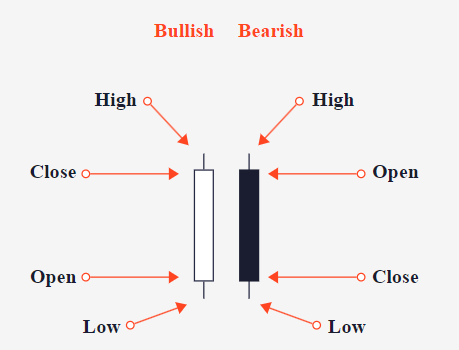

- Open (KDL: float) (Đơn vị: USD): Giá trị của Bitcoin khi một Gap bắt đầu.
- High (KDL: float) (Đơn vị: USD): Giá trị cao nhất của Bitcoin trong một Gap.
- Low (KDL: float) (Đơn vị: USD): Giá trị thấp nhất của Bitcoin trong một Gap.
- Close (KDL: float) (Đơn vị: USD): Giá trị của Bitcoin khi một Gap kết thúc.


- Volume_(BTC) (float) (Đơn vị: BTC): Tổng số BTC giao dịch trong một Gap.
- Volume_(Currency) (float) (Đơn vị: USD): Tổng số USD giao dịch tương ứng với Volume_(BTC) trong một Gap.


- Weighted_Price (float) (Đơn vị: USD/BTC): VWAP - Volume Weight Average Price là giá trung bình của tất cả các giao dịch trong một Gap, được sử dụng như một công cụ giúp làm giảm độ nhiễu thị trường cũng như làm sáng tỏ xu hướng giá.
  - VWAP = Volume_(Currency) / Volume_(BTC)

*Chuyển Timestamp sang DateTime*

In [ ]:
dateTime = df['Timestamp'].apply(lambda x : datetime.fromtimestamp(x))
df["DateTime"] = dateTime
del df["Timestamp"]

In [ ]:
df.head(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,DateTime
0,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00


# II. Mô hình hóa bộ dữ liệu

## 1. Phân bố dữ liệu của các cột thuộc tính theo khoảng giá trị (Histogram plot)

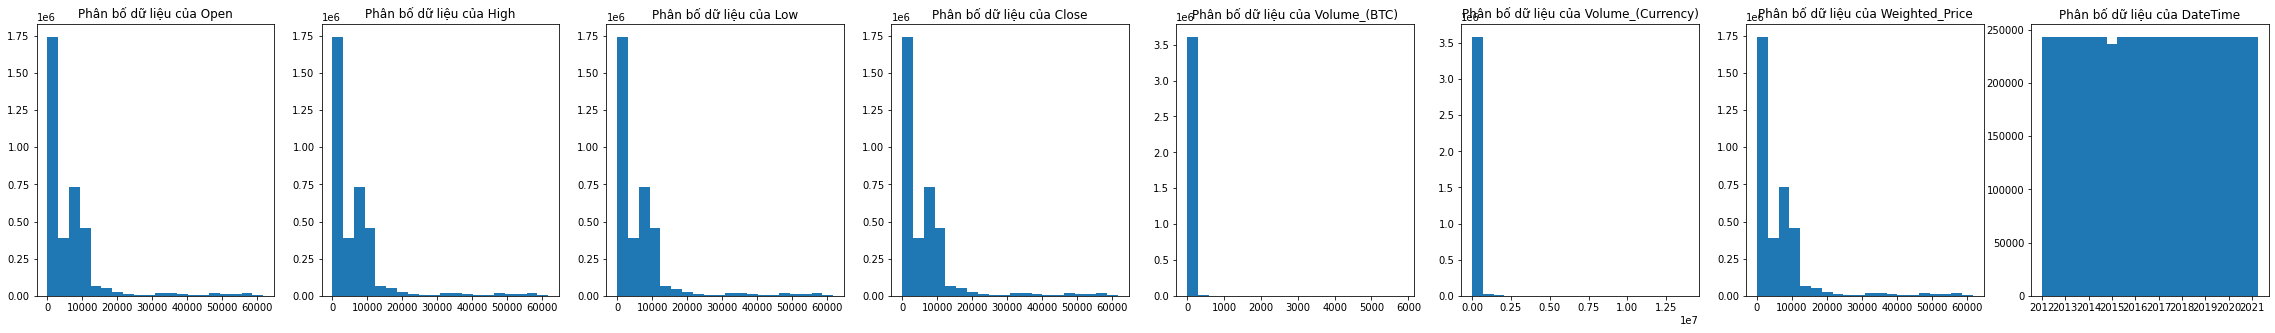

In [ ]:
fig, ax = plt.subplots(ncols=8, nrows=1, figsize=(40,5))
i = 0
for feature in df.columns:
  ax[i].set_title("Phân bố dữ liệu của " + feature)
  ax[i].hist(df[feature], bins=20)
  i += 1

In [ ]:
for feature in df.columns:
  print(feature + ": [" + str(min(df[feature])) + ", " + str(max(df[feature])) + "]")

Open: [3.8, 61763.56]
High: [3.8, 61781.83]
Low: [1.5, 61673.55]
Close: [1.5, 61781.8]
Volume_(BTC): [0.0, 5853.8521659]
Volume_(Currency): [0.0, 13900672.407]
Weighted_Price: [3.8, 61716.205341]
DateTime: [2011-12-31 07:52:00, 2021-03-31 00:00:00]


**Nhận xét:** 
  1. Khoảng giá trị của mỗi thuộc tính là rất lớn. Ví dụ: Low: [1.5, 61673.55].
  2. Tuy khoảng giá trị lớn nhưng lại phân bố không đồng đều (Những giá trị nhỏ xuất hiện với tần suất cao hơn rất nhiều).
  3. Các thuộc tính *Open, High, Low, Close, Weighted_Price* phân bố theo khoảng giá trị khá giống nhau.
  4. Thuộc tính DateTime bị thiếu dữ liệu vào năm 2015.

**Lý giải:**
  - (1) và (2): Do giá trị của Bitcoin thay đổi nhiều theo thời gian, ban đầu có giá trị thấp nhưng đến những năm gần đây giá trị lại tăng lên rất cao, nhất là trong khoảng thời gian từ *2011-12-31 07:52:00* đến *2021-03-31 00:00:00*.
  - (3): Vì khoảng giá trị của mỗi thuộc tính là rất lớn, thời gian xét trên toàn bộ dữ liệu cũng rất dài, nên chưa thể thấy rõ được sự khác biệt giữa các thuộc tính này (Ta sẽ sử dụng đồ thị scatter plot xét trên một khoảng thời gian nhỏ để thấy rõ được sự khác biệt của các thuộc tính này).
  - (4): Điều này có thể là do trao đổi (hoặc API của nó) bị lỗi, trao đổi (hoặc API của nó) không tồn tại hoặc một số lỗi kỹ thuật không lường trước khác trong báo cáo hoặc thu thập dữ liệu (Điều này đã được nhắc đến khi mô tả về bộ dữ liệu).


## 2. NaN values

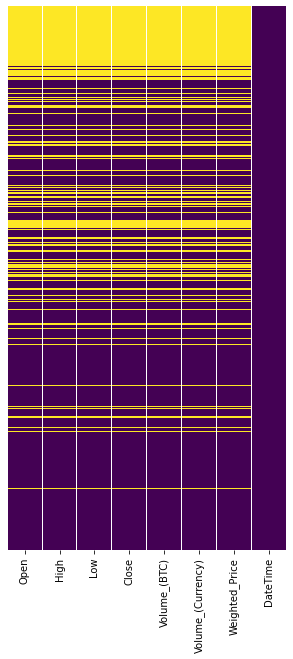

In [ ]:
fig, ax = plt.subplots(figsize=(5 ,10))
ax = sns.heatmap(data=df.isnull(), yticklabels=False, cbar =False, cmap = 'viridis')
plt.show()

In [ ]:
nan_df = df[df.isna().any(axis=1)]
print("Number of NaN rows: " + str(len(nan_df)))

Number of NaN rows: 1243608


**Nhận xét:**

- Có 1,243,608 thời điểm cập nhật không thực hiện bất kỳ giao dịch mua bán BTC nào (Khoảng 1/4 bộ dữ liệu). 

*Sự thay đổi của số lượng khoảng trống giao dịch theo thời gian*

In [ ]:
nan_df['Year'] = pd.DatetimeIndex(nan_df['DateTime']).year
nan_df['Month'] = pd.DatetimeIndex(nan_df['DateTime']).month
nan_df['Day'] = pd.DatetimeIndex(nan_df['DateTime']).day
nan_df['Hour'] = pd.DatetimeIndex(nan_df['DateTime']).hour
nan_df['Minute'] = pd.DatetimeIndex(nan_df['DateTime']).minute

del nan_df['DateTime']
del nan_df['Open']
del nan_df['High']
del nan_df['Low']
del nan_df['Close']
del nan_df['Volume_(BTC)']
del nan_df['Volume_(Currency)']
del nan_df['Weighted_Price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
nan_df.groupby(['Year']).count()

,Month,Day,Hour,Minute
Year,,,,
2011,964,964,964,964
2012,500411,500411,500411,500411
2013,205839,205839,205839,205839
2014,127424,127424,127424,127424
2015,146393,146393,146393,146393
2016,174941,174941,174941,174941
2017,42268,42268,42268,42268
2018,19827,19827,19827,19827
2019,17260,17260,17260,17260


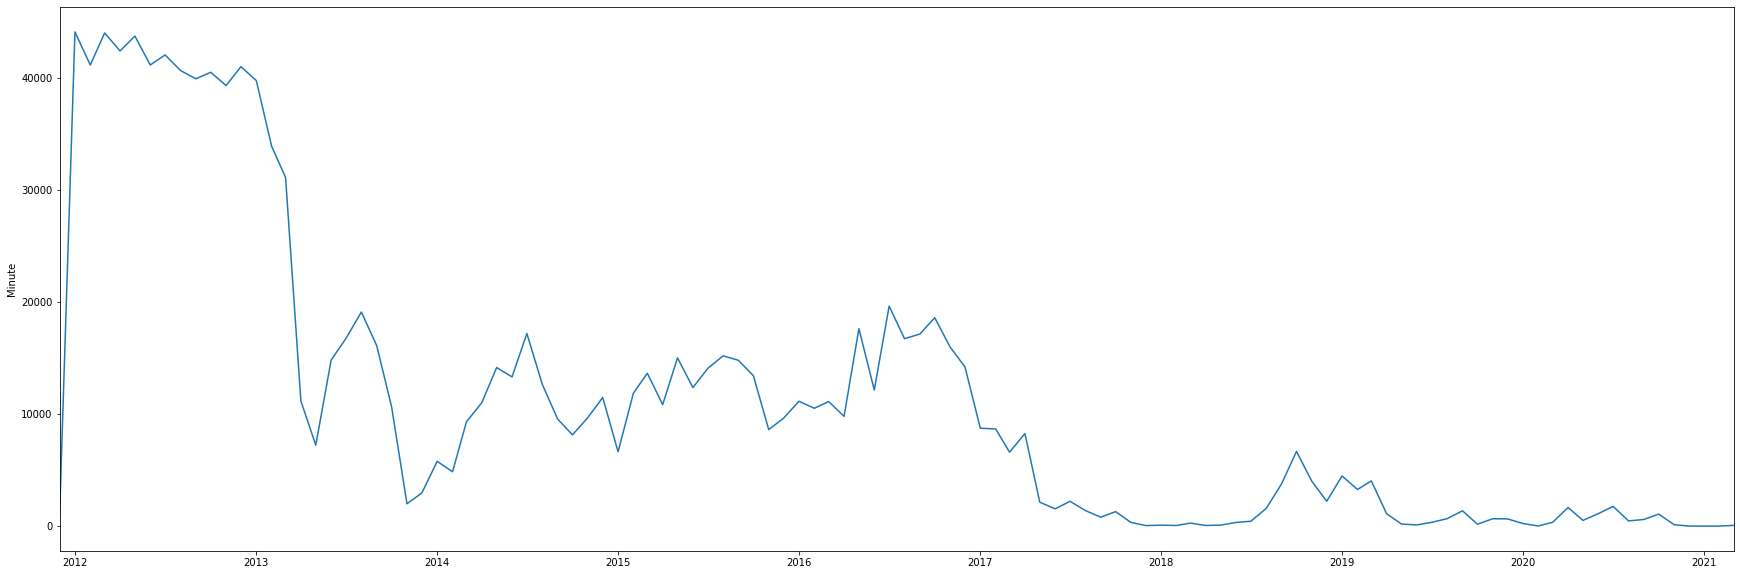

In [ ]:
gYM = nan_df.groupby(['Year', 'Month'])
gYM.count()

time_index = []
for val in gYM.count().index:
  time_index.append(datetime(val[0], val[1], 1))

fig, ax = plt.subplots(figsize=(30,10))
ax= sns.lineplot(x=time_index, y=gYM.count()['Minute'])

plt.xlim(min(time_index), max(time_index))

plt.show()

**Nhận xét:**

  - Khoảng thời gian giao dịch trống có xu hướng giảm dần theo thời gian.
  - Điều này có nghĩa là càng về sau, BTC càng được biết đến nhiều hơn, lượng giao dịch BTC càng tăng mạnh.

## 3. Phân bố dữ liệu theo thời gian Year-Month (Line plot)

In [ ]:
check_df = df.copy()
check_df['Year'] = pd.DatetimeIndex(check_df['DateTime']).year
check_df['Month'] = pd.DatetimeIndex(check_df['DateTime']).month

# Groupby Year, Month
gYM = check_df.groupby(['Year', 'Month'])

time_index = []
for val in gYM.sum().index:
  time_index.append(datetime(val[0], val[1], 1))

In [ ]:
gYM.sum()

Open          High           Low         Close  \
Year Month                                                           
2011 12     1.786000e+01  1.793000e+01  1.786000e+01  1.793000e+01   
2012 1      3.179040e+03  3.180840e+03  3.176950e+03  3.179420e+03   
     2      3.017830e+03  3.018660e+03  3.016000e+03  3.016850e+03   
     3      2.956390e+03  2.957110e+03  2.954670e+03  2.955410e+03   
     4      3.796330e+03  3.797300e+03  3.795260e+03  3.796260e+03   
...                  ...           ...           ...           ...   
2020 11     7.118983e+08  7.123239e+08  7.114589e+08  7.119089e+08   
     12     9.730877e+08  9.737286e+08  9.724246e+08  9.731057e+08   
2021 1      1.541701e+09  1.543488e+09  1.539844e+09  1.541707e+09   
     2      1.856594e+09  1.858226e+09  1.854930e+09  1.856617e+09   
     3      2.349801e+09  2.351340e+09  2.348272e+09  2.349854e+09   

             Volume_(BTC)  Volume_(Currency)  Weighted_Price  
Year Month                                                    
2011 12         95.317878       4.253203e+02    1.788641e+01  
2012 1        2019.920436       1.260929e+04    3.179323e+03  
     2        4797.173841       2.437215e+04    3.016812e+03  
     3        9012.290258       4.537028e+04    2.955748e+03  
     4       16479.774037       8.224575e+04    3.796269e+03  
...                   ...                ...             ...  
2020 11     288240.284237       4.779719e+09    7.119075e+08  
     12     256185.683590       5.765681e+09    9.730891e+08  
2021 1      457460.829786       1.572795e+10    1.541622e+09  
     2      240350.583324       1.105483e+10    1.856532e+09  
     3      153306.855508       8.336742e+09    2.349737e+09  

[112 rows x 7 columns]

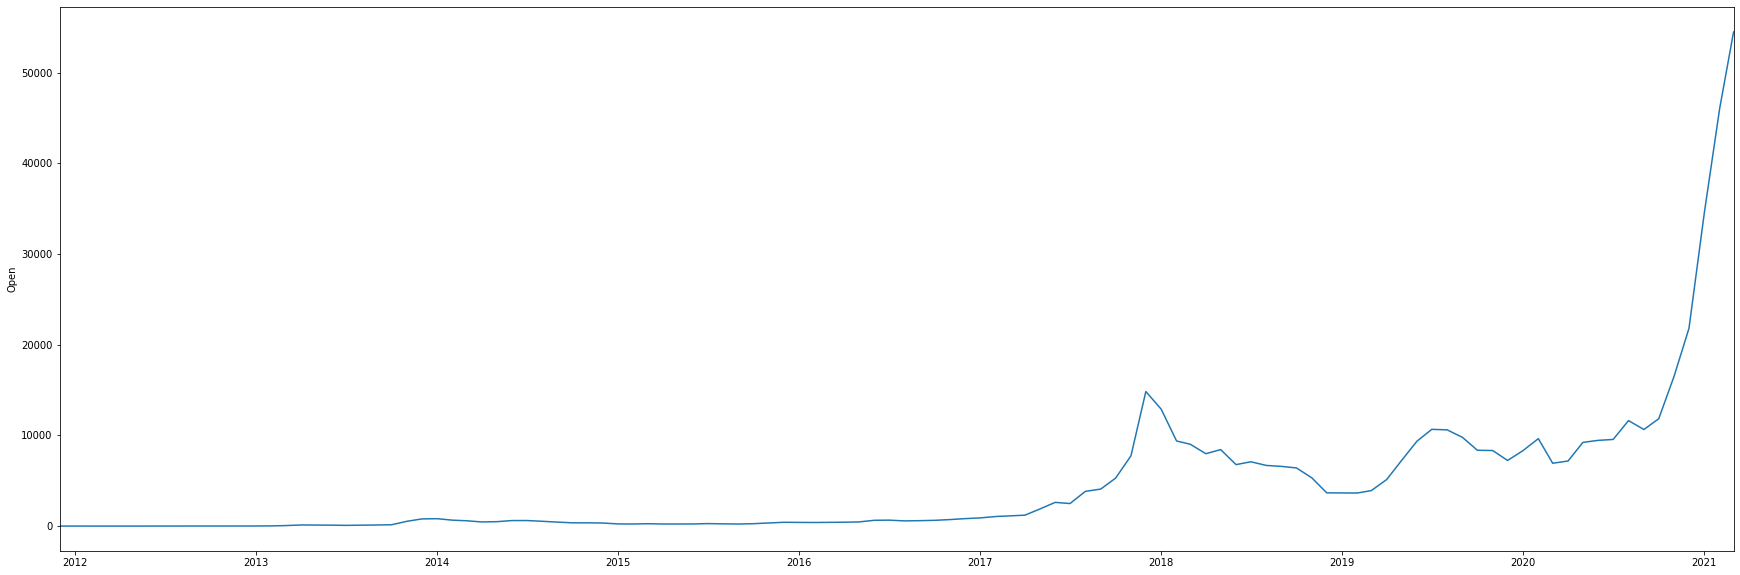

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax= sns.lineplot(x=time_index, y=gYM.mean()['Open'])

plt.xlim(min(time_index), max(time_index))
plt.show()

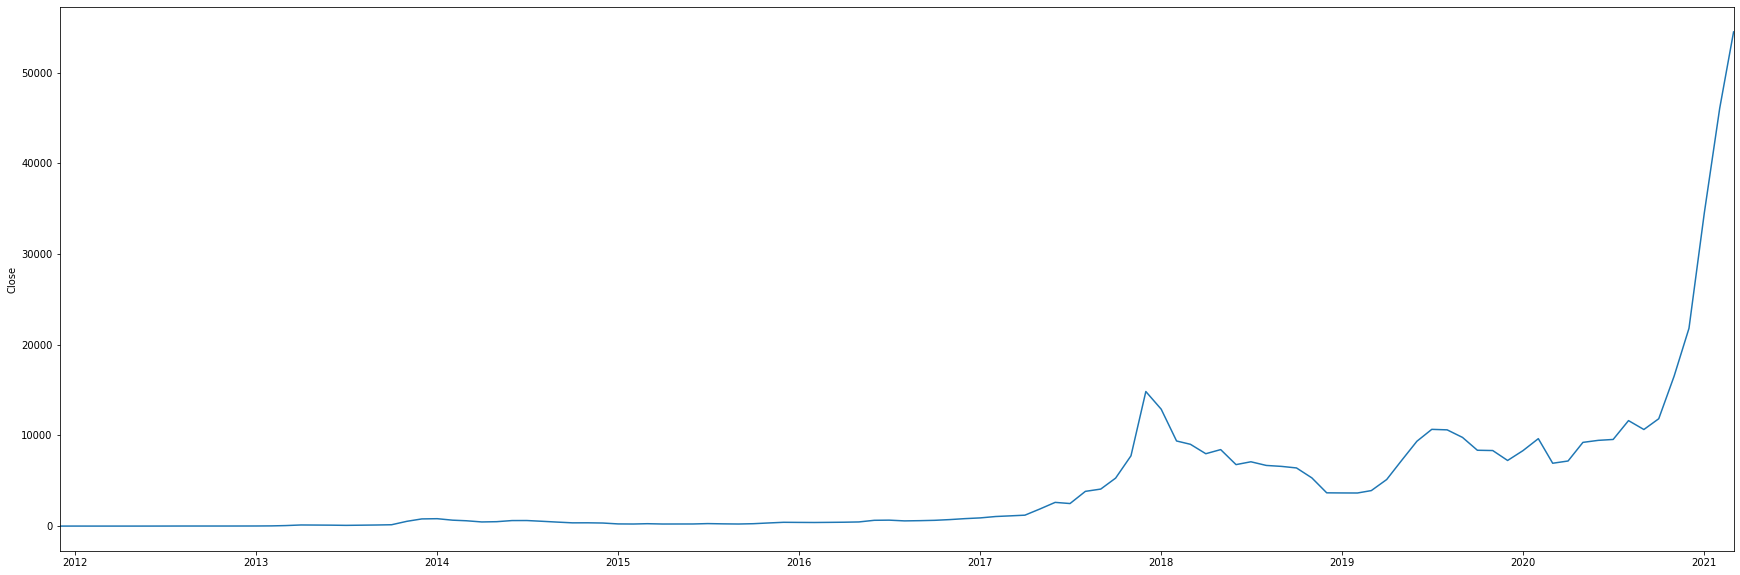

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax= sns.lineplot(x=time_index, y=gYM.mean()['Close'])

plt.xlim(min(time_index), max(time_index))
plt.show()

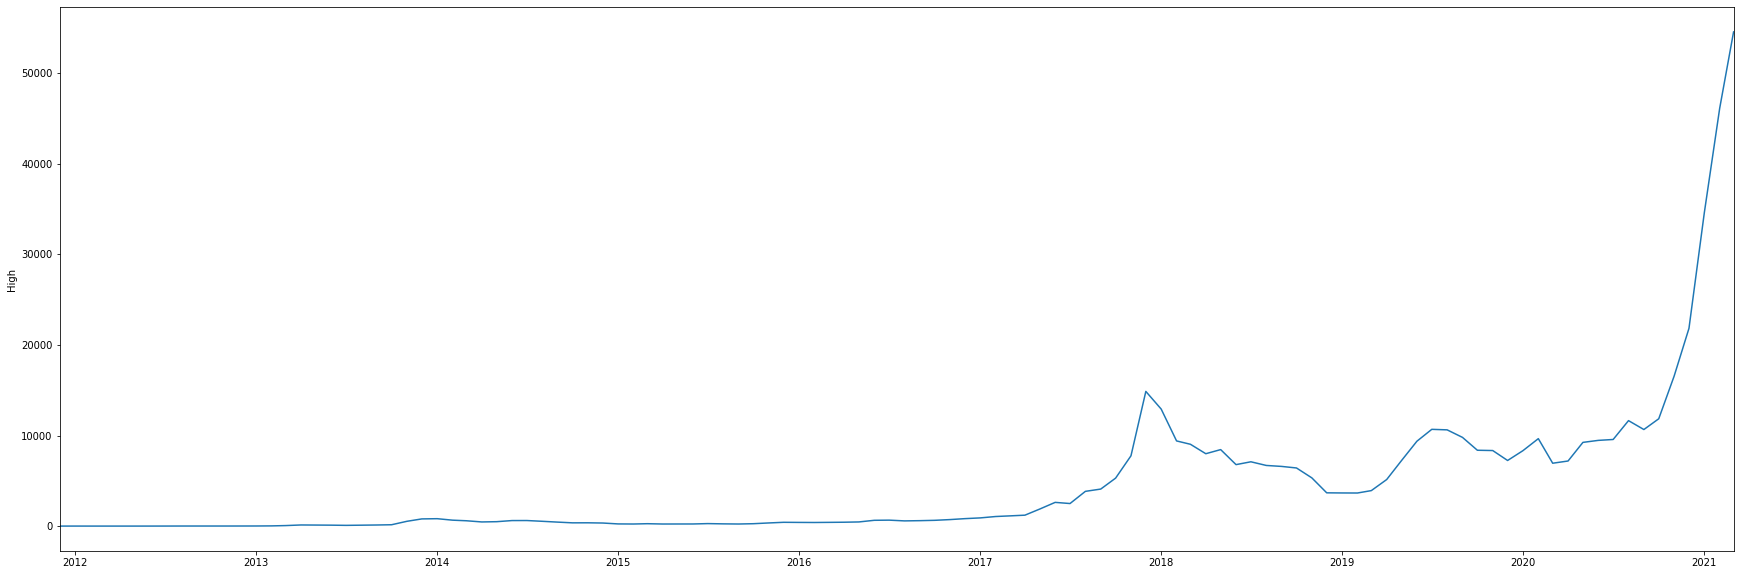

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax= sns.lineplot(x=time_index, y=gYM.mean()['High'])

plt.xlim(min(time_index), max(time_index))
plt.show()

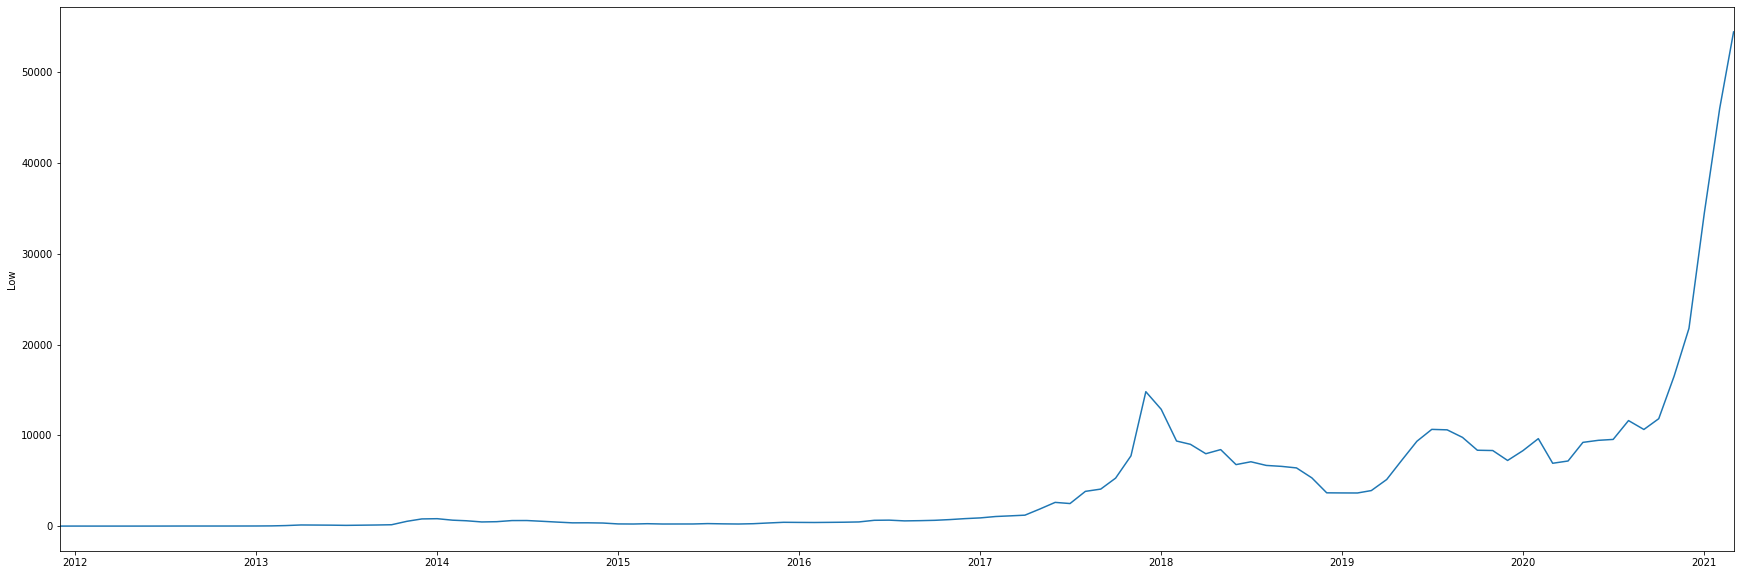

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax= sns.lineplot(x=time_index, y=gYM.mean()['Low'])

plt.xlim(min(time_index), max(time_index))
plt.show()

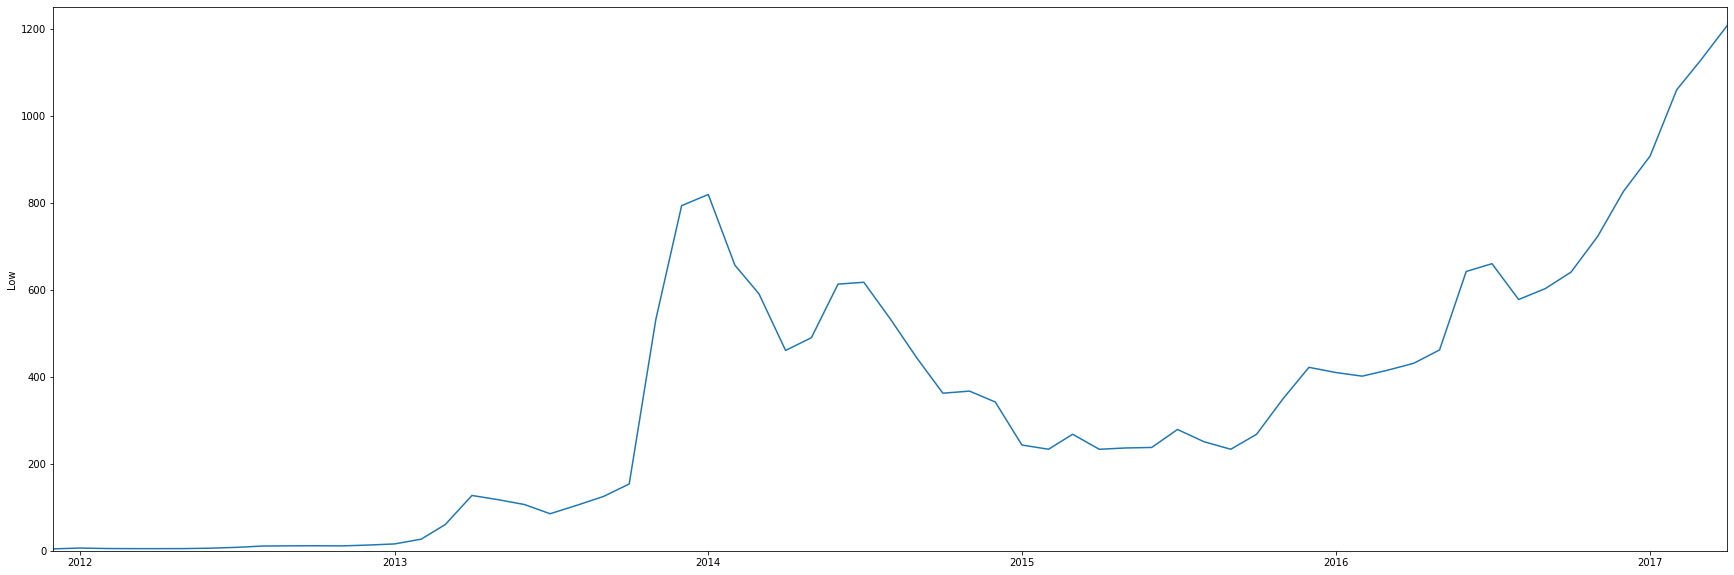

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax= sns.lineplot(x=time_index, y=gYM.mean()['Low'])

plt.xlim(min(time_index), datetime(2017,4,1))
plt.ylim(0, 1250)
plt.show()

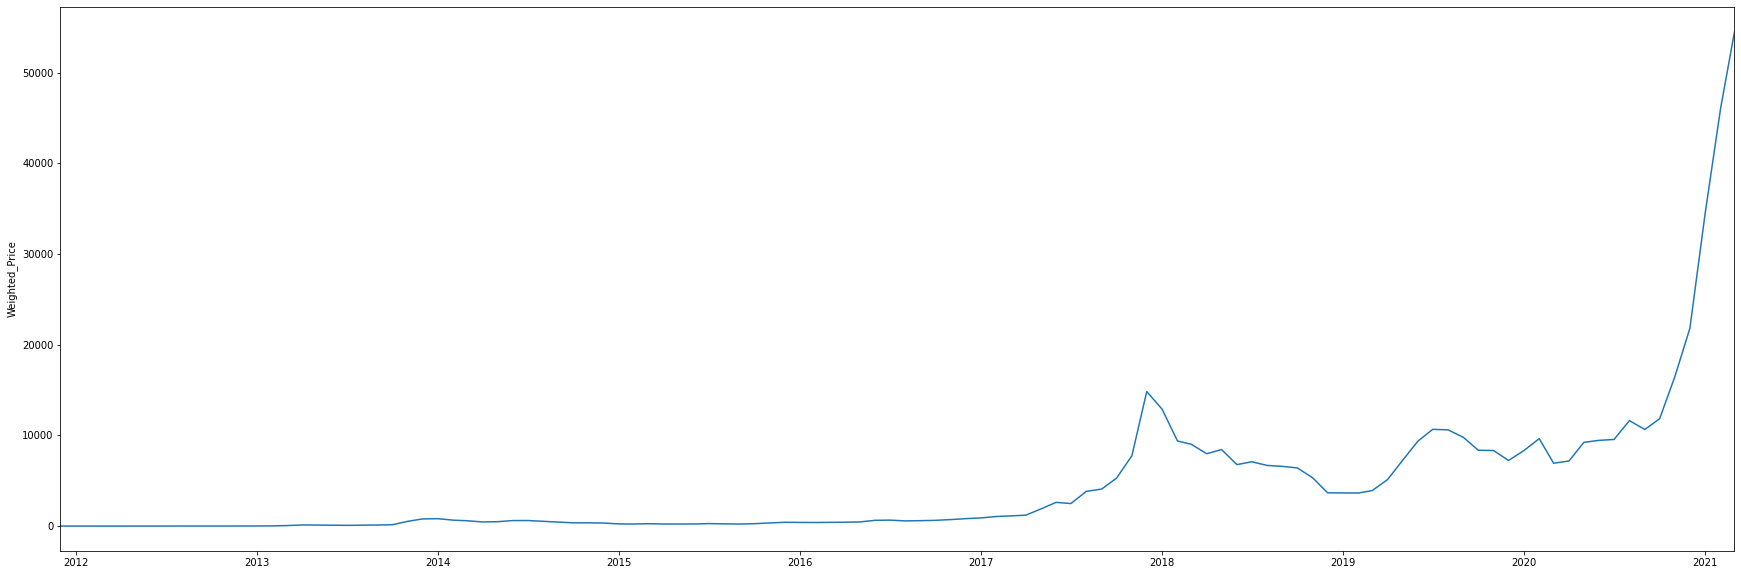

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax= sns.lineplot(x=time_index, y=gYM.mean()['Weighted_Price'])

plt.xlim(min(time_index), max(time_index))
plt.show()

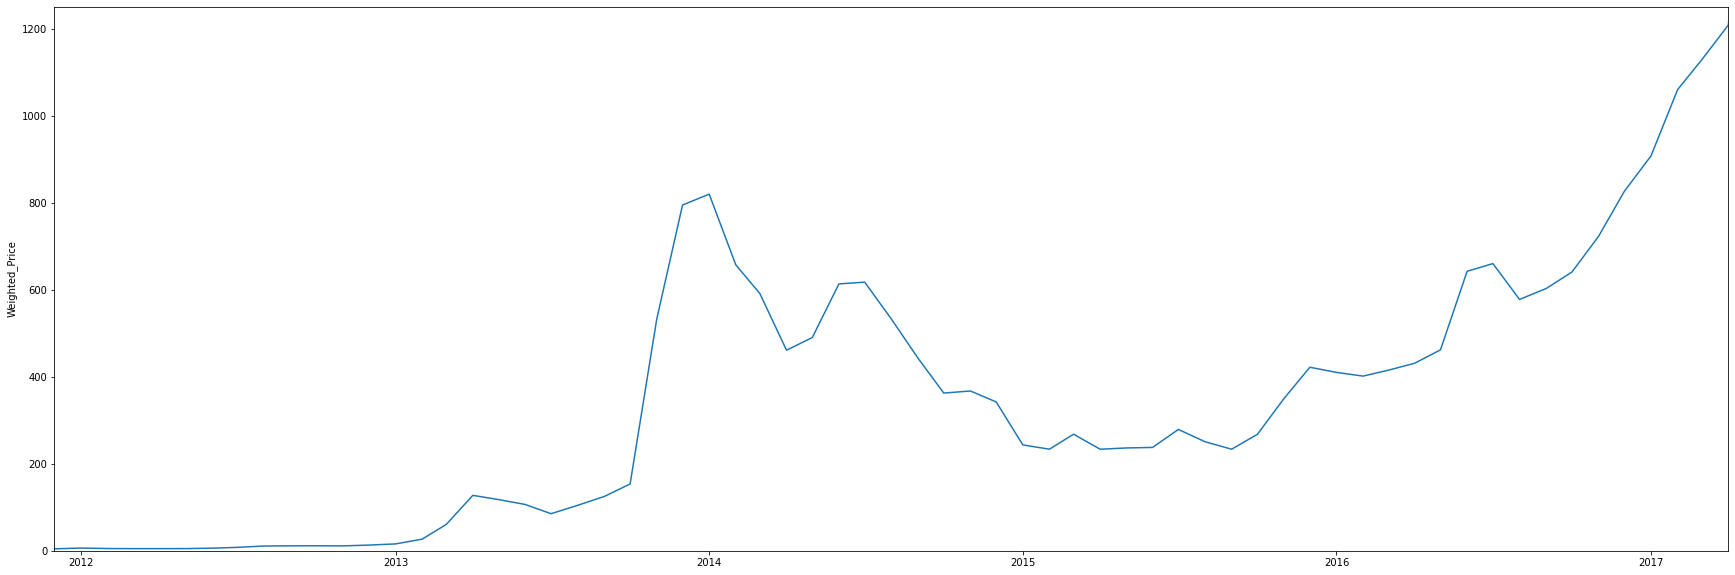

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax= sns.lineplot(x=time_index, y=gYM.mean()['Weighted_Price'])

plt.xlim(min(time_index), datetime(2017,4,1))
plt.ylim(0, 1250)
plt.show()

**Nhận xét:**
- Các thuộc tính *Open, High, Low, Close, Weighted_Price* thay đổi theo thời gian giống nhau.

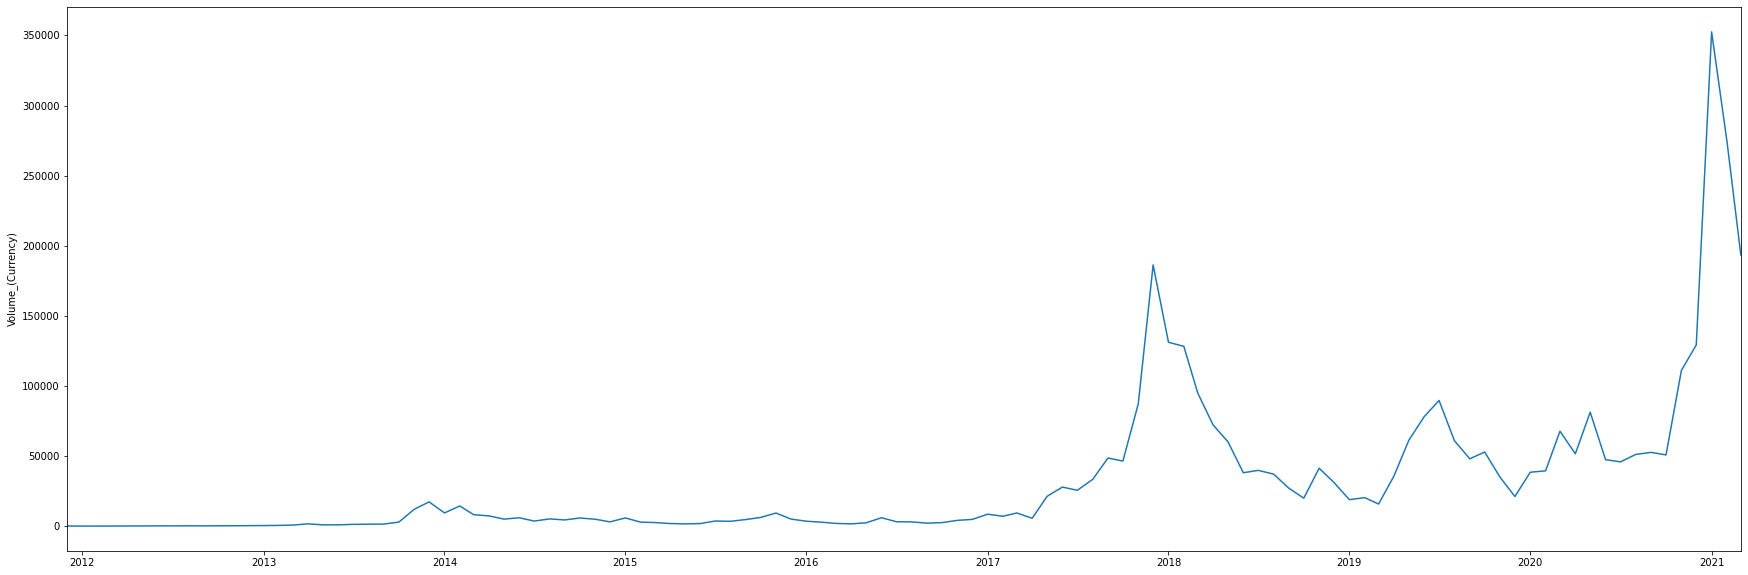

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax= sns.lineplot(x=time_index, y=gYM.mean()['Volume_(Currency)'])

plt.xlim(min(time_index), max(time_index))
plt.show()

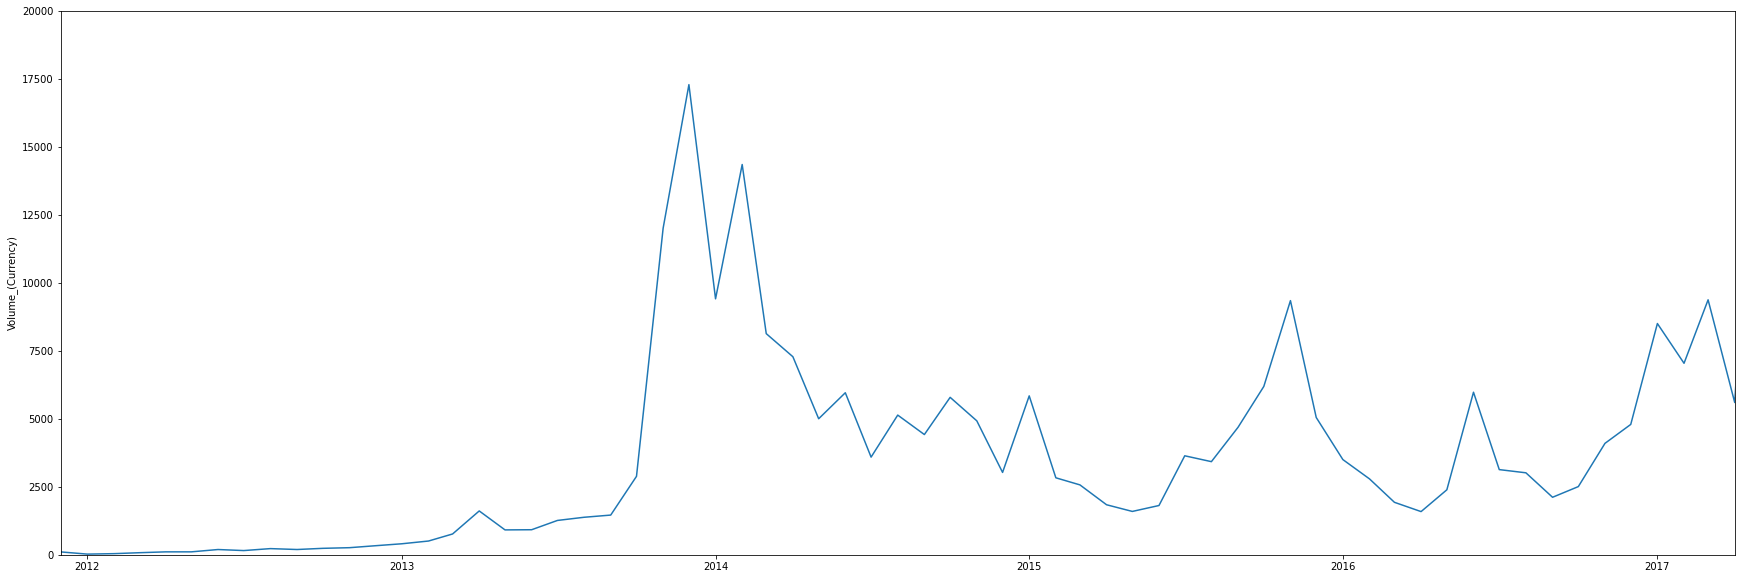

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax= sns.lineplot(x=time_index, y=gYM.mean()['Volume_(Currency)'])

plt.xlim(min(time_index), datetime(2017,4,1))
plt.ylim(0, 20000)
plt.show()

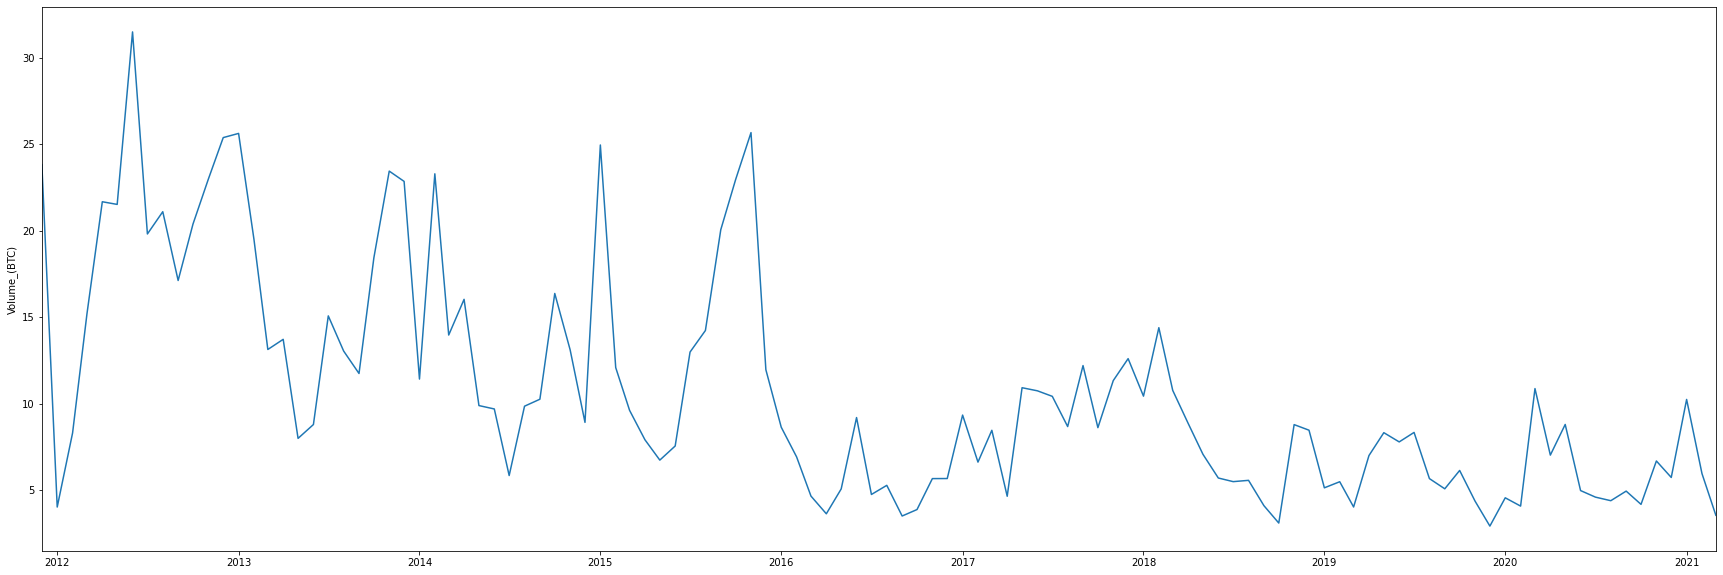

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax= sns.lineplot(x=time_index, y=gYM.mean()['Volume_(BTC)'])

plt.xlim(min(time_index), max(time_index))
plt.show()

## 4. Làm rõ Weighted_Price, High, Low trong khoảng thời gian ngắn (Scatter plot)

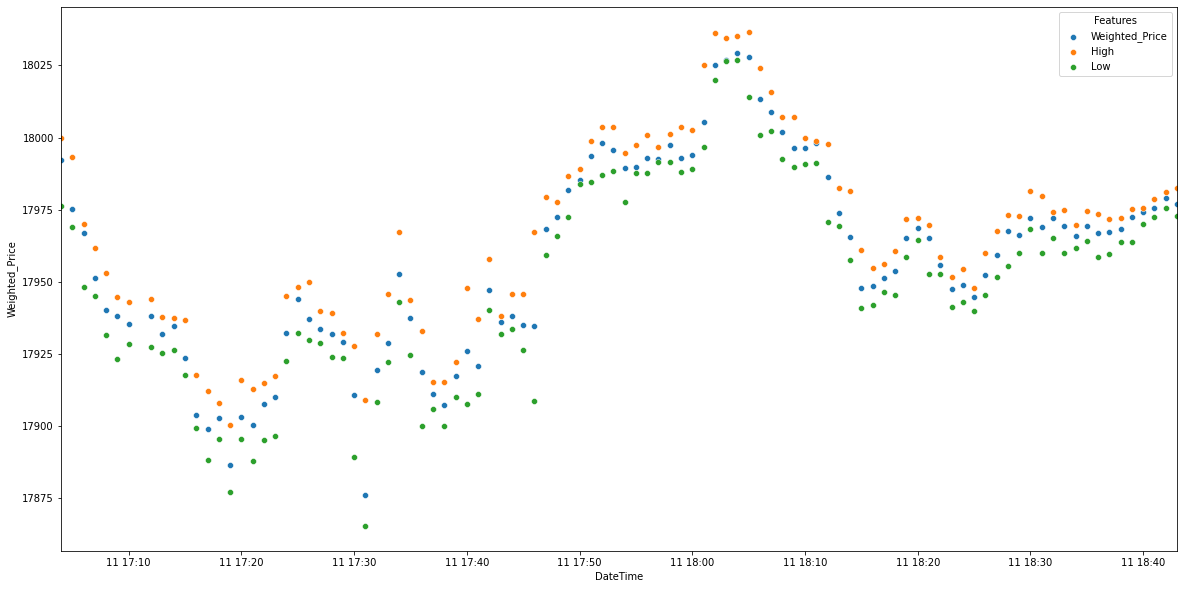

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax= sns.scatterplot(x='DateTime', y='Weighted_Price', data=df[4700000:4700100])
ax1 = sns.scatterplot(x='DateTime', y='High', data=df[4700000:4700100])
ax2 = sns.scatterplot(x='DateTime', y='Low', data=df[4700000:4700100])

plt.xlim(min(df['DateTime'][4700000:4700100]), max(df['DateTime'][4700000:4700100]))
plt.legend(labels=['Weighted_Price','High','Low'], title = "Features")
plt.show()

## 5. Correlation matrix

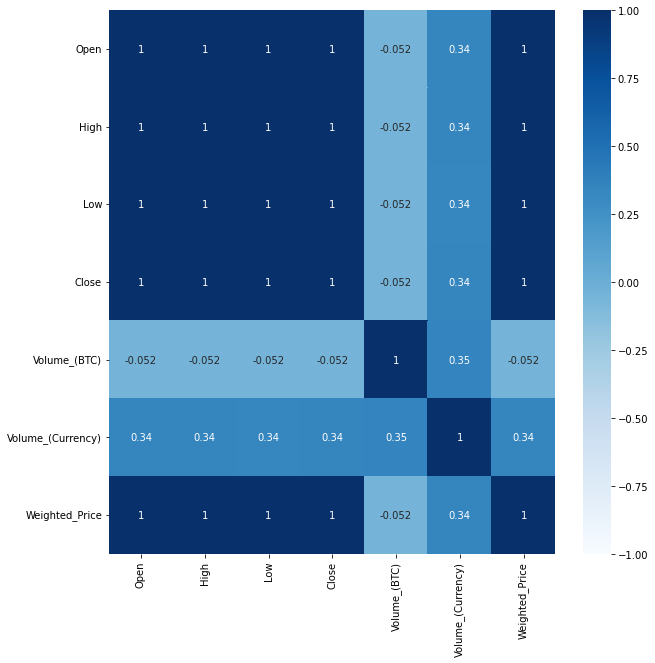

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), 
            vmin=-1, 
            vmax=1, 
            annot=True,
            cmap=plt.cm.Blues)

plt.show()

**Nhận xét:**
- Độ tương quan tuyến tính giữa 5 thuộc tính Open, High, Low, Close, Weighted là cực kỳ cao.

*Tuy nhiên việc lựa chọn nên giữ lại thuộc tính nào là phụ thuộc vào mục tiêu của bài toán. Ví dụ bài toán kiểm tra giao dịch bất thường thì việc xem xét độ chênh lệch giữa Open-Close hoặc High-Low là rất cần thiết.*